# Facial Emotion Recognition

## Dataset

https://www.kaggle.com/datasets/apollo2506/facial-recognition-dataset?rvi=1

> This dataset contains folders pertaining to different expressions of the human face, namely , Surprise, Anger, Happiness, Sad, Neutral, Disgust, Fear.
> The folders are split into two super-folders, Training and Testing, so that it can become easier for the end user to configure any model using this data.
> The training set consists of 28,079 samples in total with the testing set consisting of 7,178 samples in total. The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.

## Deep Learning for Facial Emotion Recognition: Addressing Image Recognition Challenges

> ### Challenges of Traditional Image Recognition:

- **Hand-crafted features:** Time-consuming and limited information capture.
- **Limited spatial awareness:** Struggles with crucial spatial relationships.
- **Computational inefficiency:** Expensive processing with fully connected layers.

> ### Human Advantage in Image Understanding:

- **Context understanding:** Real-world knowledge interpretation.
- **Handling ambiguity:** Proficiency in dealing with noise and missing data.
- **Common sense reasoning:** Applying common sense to unusual situations.

> ### How Our Brains Recognize Images:

- **Human visual system:** Processes visual information from retina to higher-order areas.
  
> ### Convolutional Neural Networks (CNNs) to the Rescue:

- **Automatic feature extraction:** Eliminates manual feature engineering.
- **Convolutional layers:** Capture spatial relationships crucial for image understanding.
- **Pooling layers:** Reduce dimensionality and introduce invariance to variations.
- **ReLU activation:** Introduces non-linearity for learning complex relationships.
  
> ### Convolution Operation: The Core of Feature Extraction:

- **Filter operation:** Slides across the image, detecting specific features.
  




## Importing libraries

In [66]:

import tensorflow as tf
# from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Conv2D, BatchNormalization, MaxPooling2D, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam

from keras.applications import ResNet50
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import f1_score

In [67]:
# Create ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Split data into training and validation sets
)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing



## Set images path

In [68]:
train_data_path = ('../input/facial-recognition-dataset/Training/Training/')
test_data_path = ('../input/facial-recognition-dataset/Testing/Testing/')

## Load and process images

In [69]:
# Flow through directory and process the images along with labeling them
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(48, 48),  # Adjust image size based on your model's input
    batch_size=64,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale' 
)

validation_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    shuffle=False ,
    color_mode='grayscale'
)

Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


## Custom CNN Model

## Convolutional Neural Network for Image Classification

This code defines a CNN architecture for classifying images. It takes grayscale images of size 48x48 and predicts their class membership among 6 categories.

**Key Layers:**

* **Input Layer:** Receives the input image (48x48, grayscale).
* **Convolutional Layers:** Extract features using filters (kernels).
* **Pooling Layers:** Downsample feature maps to reduce spatial dimensions.
* **Dropout Layers:** Prevent overfitting by randomly dropping neurons during training.
* **Flatten Layer:** Reshapes feature maps into a vector for fully connected layers.
* **Fully Connected Layers:** Learn complex relationships between features and classes.
    * Output layer has 6 neurons for 6 classes (softmax activation for probabilities).


In [70]:
# Create a Sequential model
cnn_model = Sequential()

In [71]:
# Add the input layer with Input(shape)
cnn_model.add(Input(shape=(48, 48, 1)))
cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

In [72]:
cnn_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

In [73]:
cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(6, activation='softmax'))


In [74]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


## Model Training

In [75]:
# Train the neural network/model
final_model = cnn_model.fit(
        train_generator,
        steps_per_epoch=22619 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=5654 // 64)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/353 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.1667 - loss: 1.8030

W0000 00:00:1713831288.610482      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 52/353 ━━━━━━━━━━━━━━━━━━━━ 1:10 235ms/step - accuracy: 0.2384 - loss: 1.7738

W0000 00:00:1713831300.412145      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2499 - loss: 1.7648

W0000 00:00:1713831321.692375      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


353/353 ━━━━━━━━━━━━━━━━━━━━ 65s 158ms/step - accuracy: 0.2499 - loss: 1.7648 - val_accuracy: 0.2990 - val_loss: 1.7116
Epoch 2/50
  1/353 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3281 - loss: 1.6454

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3281 - loss: 1.6454 - val_accuracy: 0.3636 - val_loss: 1.7042
Epoch 3/50


W0000 00:00:1713831345.555742      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


353/353 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.3287 - loss: 1.6358 - val_accuracy: 0.3796 - val_loss: 1.5367
Epoch 4/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.3281 - loss: 1.6370 - val_accuracy: 0.2727 - val_loss: 1.6940
Epoch 5/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - accuracy: 0.3949 - loss: 1.5258 - val_accuracy: 0.4341 - val_loss: 1.4478
Epoch 6/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.4844 - loss: 1.3744 - val_accuracy: 0.6818 - val_loss: 1.1812
Epoch 7/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.4269 - loss: 1.4547 - val_accuracy: 0.4572 - val_loss: 1.4004
Epoch 8/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.4219 - loss: 1.5374 - val_accuracy: 0.3182 - val_loss: 1.5230
Epoch 9/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.4546 - loss: 1.3937 - val_accuracy: 0.4744 - val_loss: 1.3521
Epoch 10/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.3906 - loss: 1.7303 - val_accuracy: 

## Model summary

In [76]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,033,748 (26.83 MB)

 Trainable params: 2,344,582 (8.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,689,166 (17.89 MB)

In [77]:
cnn_model.layers

[<Conv2D name=conv2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Dropout name=dropout_11, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Dropout name=dropout_12, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense_22, built=True>,
 <Dropout name=dropout_13, built=True>,
 <Dense name=dense_23, built=True>]

In [78]:
# Summarize training history
print("Training history:")
print("Training Loss:", final_model.history['loss'])
print("Validation Loss:", final_model.history['val_loss'])
print("Training Accuracy:", final_model.history['accuracy'])
print("Validation Accuracy:", final_model.history['val_accuracy'])

# Evaluate the model (Optional)
test_loss, test_acc = cnn_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Training history:
Training Loss: [1.750556230545044, 1.6454237699508667, 1.5997395515441895, 1.636974811553955, 1.506177306175232, 1.3744165897369385, 1.438869595527649, 1.5374068021774292, 1.3804837465286255, 1.7302699089050293, 1.3284409046173096, 1.4656035900115967, 1.2914230823516846, 1.2429590225219727, 1.247889518737793, 1.3725336790084839, 1.215236783027649, 1.163674235343933, 1.1853282451629639, 0.9822481870651245, 1.1632442474365234, 1.0308796167373657, 1.1428039073944092, 1.2766296863555908, 1.1183226108551025, 1.016660213470459, 1.0902506113052368, 0.9820362329483032, 1.0663580894470215, 1.0554966926574707, 1.0437999963760376, 1.165987491607666, 1.021583080291748, 1.1400796175003052, 1.0056260824203491, 0.9282311201095581, 0.9766027927398682, 0.8573232293128967, 0.9603492021560669, 1.1238709688186646, 0.9463014602661133, 0.8048461675643921, 0.9154277443885803, 0.8558211326599121, 0.8912947177886963, 1.077759027481079, 0.8738471865653992, 0.8491734266281128, 0.853299498558044

W0000 00:00:1713831949.694734      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


## Plots



### TRAINING LOSS VS VALIDATION LOSS

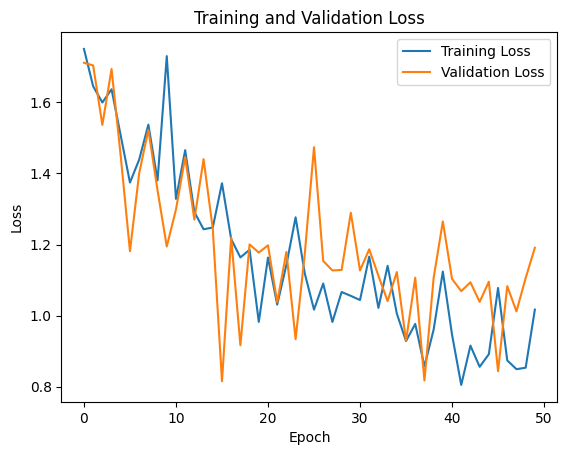

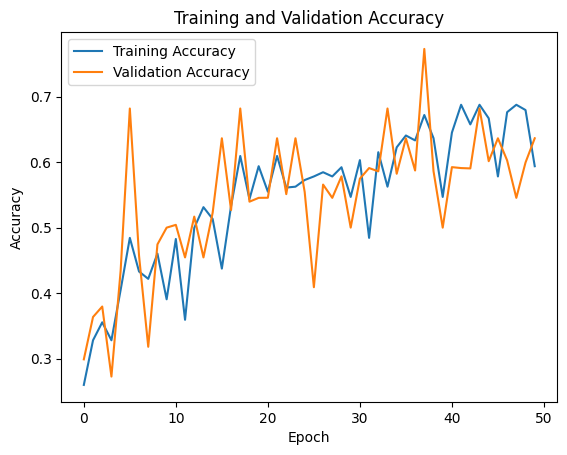

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5407 - loss: 1.2215
Test accuracy: 0.5998302102088928


In [79]:
import matplotlib.pyplot as plt

# Plot training and validation loss/accuracy
epochs = range(len(final_model.history['loss']))  # Get number of epochs

# Plot loss
plt.plot(epochs, final_model.history['loss'], label='Training Loss')
plt.plot(epochs, final_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(epochs, final_model.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, final_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model (Optional)
test_loss, test_acc = cnn_model.evaluate(test_generator)
print('Test accuracy:', test_acc)


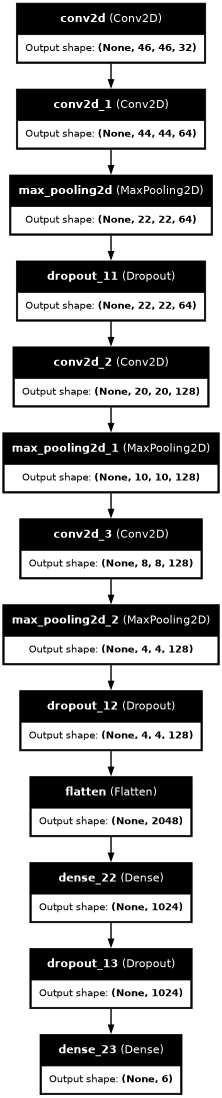

In [80]:
from tensorflow.keras.utils import plot_model

# Save a visualization of the model to a file with a smaller size
plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=50)

# Alternatively, display the model directly in Jupyter Notebook with a smaller size
plot_model(cnn_model, show_shapes=True, show_layer_names=True, dpi=50)


### Testing model on single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
Predicted class: Happy


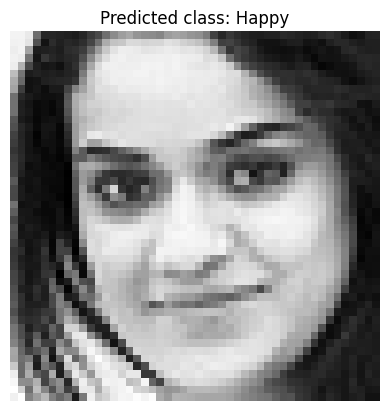

In [81]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
# Path to your test image
img_path = '../input/facial-recognition-dataset/Testing/Testing/Happy/Happy-1.jpg'  
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target_size based on your model's input
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize pixel values to [0, 1]

# Make predictions
predictions = cnn_model.predict(x)
class_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad','Surprise']

predicted_class = class_names[np.argmax(predictions)]

print("Predicted class:", predicted_class)


# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()

### Confusion matrix

  5/111 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step

W0000 00:00:1713831957.946556      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step


W0000 00:00:1713831964.384256      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


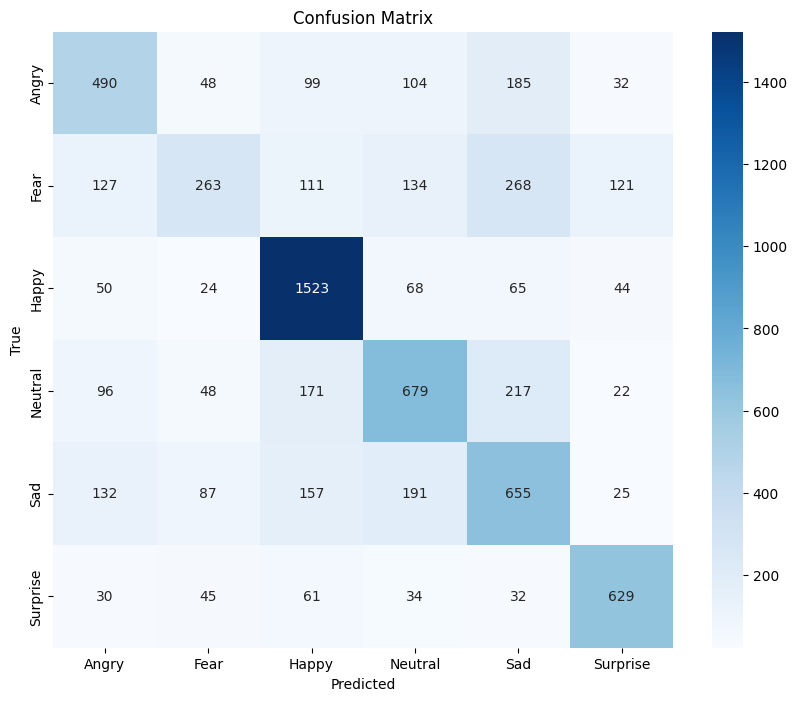

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test data
test_predictions = cnn_model.predict(test_generator)
predicted_labels = np.argmax(test_predictions, axis=1)

# Extract true labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [83]:
# save model structure in jason file
model_json = cnn_model.to_json()
with open("cnn_model_latest.json", "w") as json_file:
    json_file.write(model_json)


In [84]:
# Assume cnn_model is your trained CNN model
cnn_model.save_weights('cnn_model_latest.weights.h5')


## RestNet50Model

### Rescaling and Generating Images

In [85]:
# Define data generators with preprocessing within flow_from_directory
# Images are grayscale, specify data_format='channels_last'
resnet_train_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last', validation_split=0.2)  # Adjust parameters as needed
resnet_test_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')

### Processing images

In [86]:
# This allows rescaling to work correctly with single-channel images
resnet_train_data = resnet_train_generator.flow_from_directory(
    train_data_path,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical' ,
    subset='training',
)
resnet_validation_data = resnet_train_generator.flow_from_directory(
    train_data_path,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
)

resnet_test_data =  resnet_test_generator.flow_from_directory(
    test_data_path,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
)


Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


### Defining model

In [87]:
# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False)

# Create a new model with ResNet50 as base and additional layers
resnet50_input = Input(shape=(48, 48, 3))
x = resnet_model(resnet50_input)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)  # Adjust output units based on your classification task

resnet50_model = Model(inputs=resnet50_input, outputs=outputs)

# Freeze the base ResNet50 layers
for layer in resnet_model.layers:
    layer.trainable = False


### Fitting the model

In [88]:
# Early stopping (optional)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Adjust parameters as needed

# Model checkpoint (optional)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_acc')  # Adjust parameters as needed

resnet50_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001 ), metrics=['accuracy'])
history = resnet50_model.fit(
    resnet_train_data,
    epochs=40,
    batch_size=64,
    validation_data=resnet_test_data,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/354 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.1507 - loss: 2.1601

W0000 00:00:1713831980.689392      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


353/354 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1862 - loss: 1.9748

W0000 00:00:1713832005.494459      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713832009.534251      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


354/354 ━━━━━━━━━━━━━━━━━━━━ 48s 104ms/step - accuracy: 0.1862 - loss: 1.9746 - val_accuracy: 0.2519 - val_loss: 1.7522
Epoch 2/40


W0000 00:00:1713832017.292392      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


354/354 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.2044 - loss: 1.8795 - val_accuracy: 0.2526 - val_loss: 1.7423
Epoch 3/40
354/354 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.2170 - loss: 1.8251 - val_accuracy: 0.2522 - val_loss: 1.7336
Epoch 4/40
354/354 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.2391 - loss: 1.7855 - val_accuracy: 0.2574 - val_loss: 1.7265
Epoch 5/40
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.2419 - loss: 1.7601 - val_accuracy: 0.2615 - val_loss: 1.7221
Epoch 6/40
354/354 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.2487 - loss: 1.7456 - val_accuracy: 0.2604 - val_loss: 1.7172
Epoch 7/40
354/354 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.2621 - loss: 1.7312 - val_accuracy: 0.2594 - val_loss: 1.7165
Epoch 8/40
354/354 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.2662 - loss: 1.7281 - val_accuracy: 0.2640 - val_loss: 1.7107
Epoch 9/40
354/354 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.2682 - loss: 1.7195 - val_accurac

In [89]:
resnet50_model.summary()

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,900,692 (114.06 MB)

 Trainable params: 2,104,326 (8.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,208,654 (16.05 MB)

### Evaluating model

In [90]:
# Summarize training history
print("Training history:")
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])

# Evaluate the model (Optional)
test_loss, test_acc = resnet50_model.evaluate(resnet_test_data)
print('Test accuracy:', test_acc)

Training history:
Training Loss: [1.9348903894424438, 1.8628617525100708, 1.8185200691223145, 1.7809979915618896, 1.7567652463912964, 1.7450242042541504, 1.7334628105163574, 1.727171778678894, 1.720516324043274, 1.7187614440917969, 1.712214469909668, 1.7086504697799683, 1.7056794166564941, 1.7033436298370361, 1.702426552772522, 1.6981796026229858, 1.6977345943450928, 1.695214033126831, 1.6908597946166992, 1.6902786493301392, 1.6888335943222046, 1.6871027946472168, 1.683894395828247, 1.6818102598190308, 1.6814020872116089, 1.6784955263137817, 1.6790374517440796, 1.6770976781845093, 1.67515230178833, 1.6749813556671143, 1.6727317571640015, 1.66972815990448, 1.6701780557632446, 1.6666909456253052, 1.6647276878356934, 1.6650773286819458, 1.6633669137954712, 1.660670518875122, 1.6599881649017334, 1.6596150398254395]
Validation Loss: [1.7522342205047607, 1.7423232793807983, 1.733628273010254, 1.726536750793457, 1.7221492528915405, 1.7171587944030762, 1.716493844985962, 1.7106950283050537, 1.

### Plots

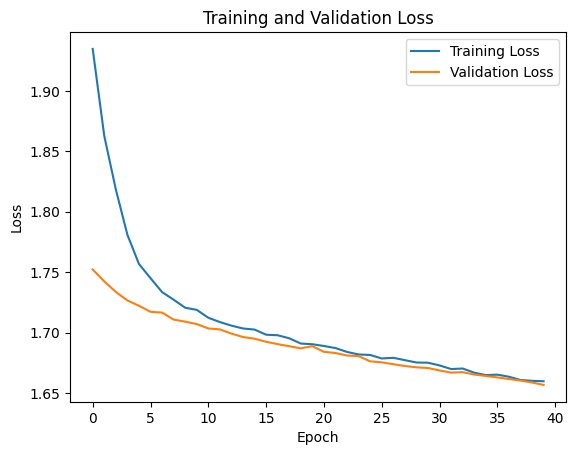

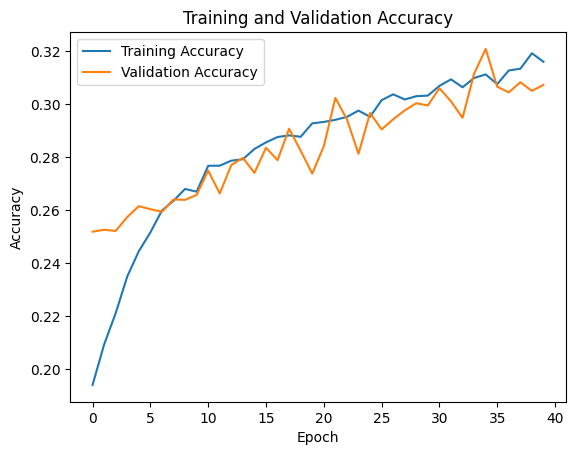

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.3046 - loss: 1.6613
Test accuracy: 0.307343989610672


In [91]:
import matplotlib.pyplot as plt

# Plot training and validation loss/accuracy
epochs = range(len(history.history['loss']))  # Get number of epochs

# Plot loss
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model (Optional)
test_loss, test_acc = resnet50_model.evaluate(resnet_test_data)
print('Test accuracy:', test_acc)


### Saving model as JSON

In [92]:
# save model structure in jason file
model_json = resnet50_model.to_json()
with open("restnet_model.json", "w") as json_file:
    json_file.write(model_json)


### Saving model weights

In [93]:
# Save the trained model weights
resnet50_model.save_weights('restnet_model.weights.h5')

## Plots

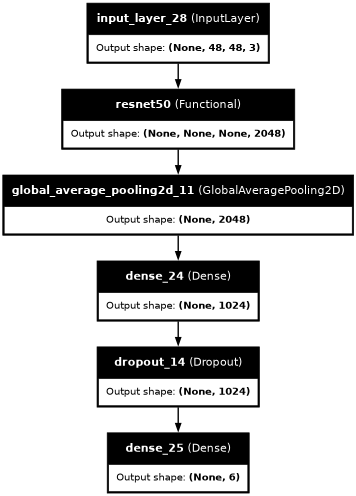

In [94]:
from tensorflow.keras.utils import plot_model

# Save a visualization of the model to a file with a smaller size
plot_model(resnet50_model, to_file='restnet50_model_plot.png', show_shapes=True, show_layer_names=True, dpi=50)

# Alternatively, display the model directly in Jupyter Notebook with a smaller size
plot_model(resnet50_model, show_shapes=True, show_layer_names=True, dpi=50)


## Testing model on one image

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: Surprise


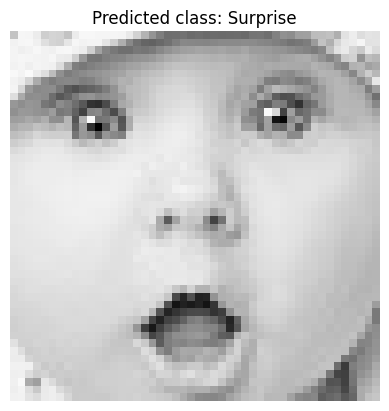

In [95]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
# Path to your test image
img_path = '../input/facial-recognition-dataset/Testing/Testing/Suprise/Suprise-1.jpg'  
img = image.load_img(img_path, target_size=(48, 48))  # Adjust target_size based on your model's input
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize pixel values to [0, 1]

# Make predictions
predictions = resnet50_model.predict(x)
class_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad','Surprise']

predicted_class = class_names[np.argmax(predictions)]

print("Predicted class:", predicted_class)


# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()

### Confusion matrix

  5/111 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step

W0000 00:00:1713833106.727705      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step


W0000 00:00:1713833116.083925      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


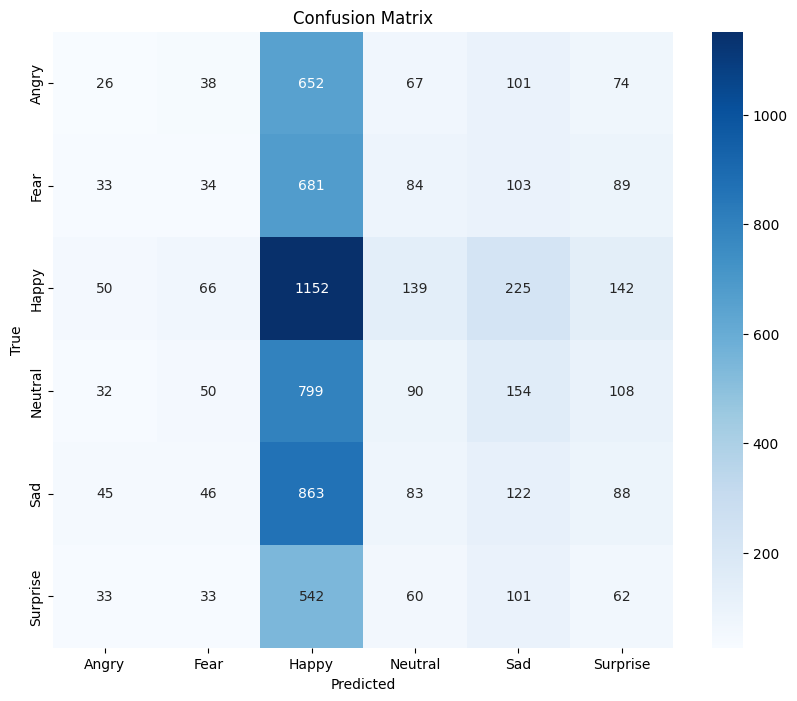

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test data
test_predictions = resnet50_model.predict(resnet_test_data)
predicted_labels = np.argmax(test_predictions, axis=1)

# Extract true labels from the test generator
true_labels = resnet_test_data.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Custom CNN model  vs ResNet50 Model

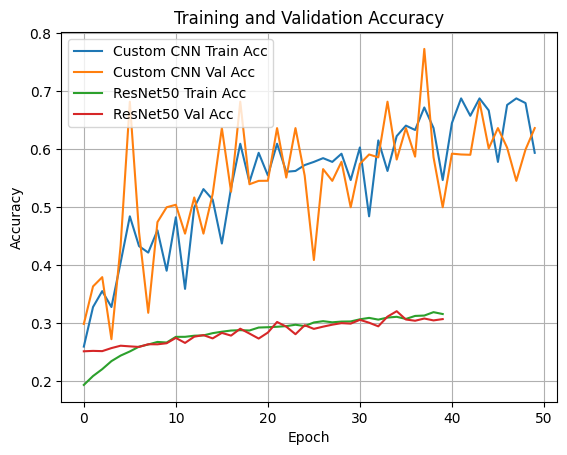

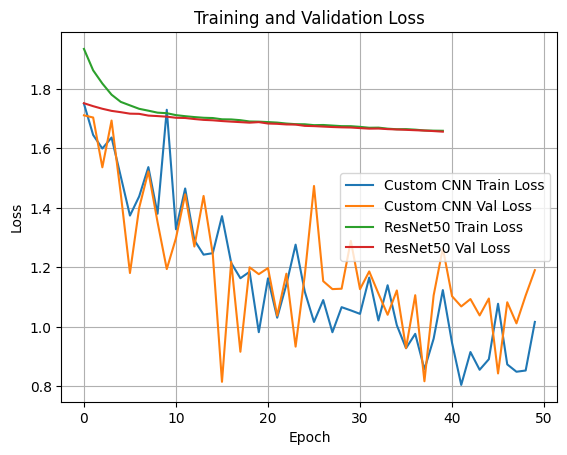

In [98]:
import matplotlib.pyplot as plt

# Load the best models (assuming you have a mechanism to save them)

# Extract training and validation accuracy/loss for plotting
cnn_train_acc = final_model.history['accuracy']
cnn_val_acc = final_model.history['val_accuracy']
cnn_train_loss = final_model.history['loss']
cnn_val_loss = final_model.history['val_loss']

resnet50_train_acc = history.history['accuracy']
resnet50_val_acc = history.history['val_accuracy']
resnet50_train_loss = history.history['loss']
resnet50_val_loss = history.history['val_loss']

# Create accuracy plot
plt.plot(cnn_train_acc, label='Custom CNN Train Acc')
plt.plot(cnn_val_acc, label='Custom CNN Val Acc')
plt.plot(resnet50_train_acc, label='ResNet50 Train Acc')
plt.plot(resnet50_val_acc, label='ResNet50 Val Acc')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Create loss plot (similar structure as accuracy plot)
plt.plot(cnn_train_loss, label='Custom CNN Train Loss')
plt.plot(cnn_val_loss, label='Custom CNN Val Loss')
plt.plot(resnet50_train_loss, label='ResNet50 Train Loss')
plt.plot(resnet50_val_loss, label='ResNet50 Val Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

- **CNNs offer a powerful approach** to image recognition tasks like FER.
- They learn features directly from data, capture spatial relationships, and achieve some invariance to variations.
- Significant advancements in facial emotion recognition and other computer vision applications are possible.

The ResNet50-based model exhibits an initial spike in training accuracy owing to its pretraining on the ImageNet dataset, which provides a significant head start in learning rich and abstract features from a vast array of images. However, the Custom CNN model, although displaying a slower learning curve, ultimately achieves a higher final accuracy compared to the ResNet50-based model. This outcome can be attributed to the fact that while the core layers of ResNet50 remain frozen during training, limiting their adaptability, the Custom CNN model allows for the learning of essential weights throughout the training process.

Consequently, the observed initial spike in training accuracy in the ResNet50-based model does not necessarily indicate a superior model. It underscores the importance of considering the entire training trajectory and the adaptability of the model's architecture when assessing its performance and potential for achieving high accuracy on the given task.

# License

MIT License

Copyright (c) 2024 Manashree Patel

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.